In [2]:
import pandas as pd
import numpy as np
# Define format for floating-point numbers. Just to avoid numbers like 2.486000e+04
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns 
sns.set_theme(style="whitegrid")
palette="viridis"
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv("house_data_cleaned.csv")
df.head()

,url,name,Parking Spaces,Floor Size,Garden,Listing Number,Type of Property,Listing Date,Pets Allowed,Reception Rooms,Erf Size,Pool,price2,address,days_since_listing,Bedrooms2,Bathrooms2,Garages,Parking
0,https://www.property24.com/for-sale/val-de-vie...,2 Bedroom Apartment / Flat for Sale,1.00,104.00,Yes,113950647.00,Apartment / Flat,2024-02-05,No,1.00,NaN,No,6600000,Val De Vie Estate,184,2.00,2.00,0.00,1.00
1,https://www.property24.com/for-sale/villa-diam...,3 Bedroom House for Sale,2.00,216.00,No,114444358.00,House,2024-05-23,Yes,2.00,328.00,No,2595000,Villa Diamante,76,3.00,2.50,1.00,1.00
2,https://www.property24.com/for-sale/table-view...,2 Bedroom Apartment / Flat for Sale,1.00,59.00,No,114644338.00,Apartment / Flat,2024-07-10,NaN,0.00,NaN,Yes,1295000,Table View,28,2.00,1.00,0.00,1.00
3,https://www.property24.com/for-sale/bonnie-bra...,5 Bedroom House for Sale,6.00,225.00,No,114531361.00,House,2024-06-13,Yes,0.00,600.00,No,2345000,Bonnie Brae,55,5.00,4.00,2.00,4.00
4,https://www.property24.com/for-sale/hartenbos-...,4 Bedroom Townhouse for Sale,0.00,96.00,Yes,114754879.00,Townhouse,2024-08-05,NaN,0.00,135.00,Yes,1850000,Hartenbos Central,2,4.00,2.00,0.00,0.00


In [4]:
df.address.unique()

array(['Val De Vie Estate', 'Villa Diamante', 'Table View', ...,
       'Bonnievale Rural', 'Concordia', 'Fernwood Estate'], dtype=object)

In [5]:
df.address.value_counts()

address
Cape Town City Centre          615
Sandown                        565
Parklands                      467
Sea Point                      282
Table View                     247
                              ... 
Strandloper                      1
Stasieweg                        1
Cherry Creek Country Estate      1
Solar Beach                      1
Fernwood Estate                  1
Name: count, Length: 1362, dtype: int64

In [6]:
df= df[df.address=="Sandown"]

In [7]:
# for col in ['Parking Spaces', 'Floor Size', 'Reception Rooms', 'Erf Size', 'Bedrooms2', 'Bathrooms2','Parking Spaces']:
#     # Calculate the IQR (Interquartile Range)
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1

#     # Define the outlier threshold
#     outlier_threshold = Q3 + 1.5 * IQR

#     # Identify rows above the outlier threshold
#     df = df[df[col] <= outlier_threshold]
#     # outliers.url.to_list()

In [8]:
## let's remove the attributes we wont be using
df.drop(["url", "name", "Listing Number", "Listing Date"], axis=1, inplace=True)

In [9]:
df

,Parking Spaces,Floor Size,Garden,Type of Property,Pets Allowed,Reception Rooms,Erf Size,Pool,price2,address,days_since_listing,Bedrooms2,Bathrooms2,Garages,Parking
75,1.00,41.00,No,Apartment / Flat,Yes,0.00,41.00,Yes,1150000,Sandown,2,1.00,1.00,0.00,1.00
346,4.00,272.00,Yes,House,Yes,0.00,325.00,Yes,4850000,Sandown,2,4.00,3.00,2.00,2.00
628,2.00,109.00,No,Apartment / Flat,Yes,0.00,109.00,Yes,2080000,Sandown,8,3.00,2.00,0.00,2.00
733,2.00,113.00,No,Apartment / Flat,Yes,0.00,113.00,No,1879500,Sandown,5,3.00,2.00,1.00,1.00
836,2.00,307.00,Yes,House,Yes,0.00,450.00,Yes,5350000,Sandown,5,4.00,4.00,2.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24764,4.00,240.00,No,House,Yes,0.00,293.00,No,3890000,Sandown,275,4.00,3.00,2.00,2.00
24789,2.00,NaN,No,House,Yes,2.00,NaN,No,2750000,Sandown,259,3.00,2.00,2.00,0.00
24795,2.00,NaN,No,House,NaN,0.00,386.00,No,4495000,Sandown,163,4.00,3.00,2.00,0.00
24798,2.00,208.00,No,House,NaN,0.00,269.00,No,3600000,Sandown,447,4.00,3.00,2.00,0.00


In [10]:
df.shape

(565, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 75 to 24857
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Parking Spaces      565 non-null    float64
 1   Floor Size          481 non-null    float64
 2   Garden              565 non-null    object 
 3   Type of Property    565 non-null    object 
 4   Pets Allowed        431 non-null    object 
 5   Reception Rooms     565 non-null    float64
 6   Erf Size            387 non-null    float64
 7   Pool                565 non-null    object 
 8   price2              565 non-null    int64  
 9   address             565 non-null    object 
 10  days_since_listing  565 non-null    int64  
 11  Bedrooms2           556 non-null    float64
 12  Bathrooms2          555 non-null    float64
 13  Garages             565 non-null    float64
 14  Parking             565 non-null    float64
dtypes: float64(8), int64(2), object(5)
memory usage: 70.6+ KB


In [12]:
df.isnull().sum().sort_values(ascending=False)

Erf Size              178
Pets Allowed          134
Floor Size             84
Bathrooms2             10
Bedrooms2               9
Parking Spaces          0
Garden                  0
Type of Property        0
Reception Rooms         0
Pool                    0
price2                  0
address                 0
days_since_listing      0
Garages                 0
Parking                 0
dtype: int64

In [13]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Parking Spaces,565.00,NaN,NaN,NaN,2.58,1.47,0.00,1.00,2.00,4.00,12.00
Floor Size,481.00,NaN,NaN,NaN,174.32,68.16,24.00,118.00,175.00,227.00,365.00
Garden,565,2,Yes,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type of Property,565,3,House,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pets Allowed,431,2,Yes,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reception Rooms,565.00,NaN,NaN,NaN,0.63,0.90,0.00,0.00,0.00,2.00,3.00
Erf Size,387.00,NaN,NaN,NaN,663.60,3687.98,38.00,250.00,250.00,325.00,63716.00
Pool,565,2,No,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price2,565.00,NaN,NaN,NaN,3134451.12,1145800.09,719900.00,2131500.00,3149000.00,3995000.00,6500000.00
address,565,1,Sandown,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
non_numeric_cols = df.columns[df.dtypes=="object"]
non_numeric_cols

Index(['Garden', 'Type of Property', 'Pets Allowed', 'Pool', 'address'], dtype='object')

In [15]:

def plot_categores(col,top=10, truncate=True):
    # Create the count plot
    plt.figure(figsize=(12, 6))

    data = df[col].value_counts(dropna=False).reset_index().sort_values(by="count", ascending=False).fillna("null")
    if len(data)>top and truncate:
        print("More than 10 categories found. Data truncated.")
        data = data.head(top)

    ax = sns.barplot(data, x=col, y="count", color="lightblue", order=data[col], edgecolor='w')

    # Add labels and title
    ax.set_xlabel(f"{col}", fontsize=12)
    ax.set_ylabel("Freq", fontsize=12)
    ax.set_title(f"Count of {col}", fontsize=14)

    # Annotate bars with count values
    for p in ax.patches:
        ax.annotate(format(int(p.get_height())), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

    # Show plot
    plt.tight_layout()
    plt.show()
    return data.to_dict(orient="records")

More than 10 categories found. Data truncated.


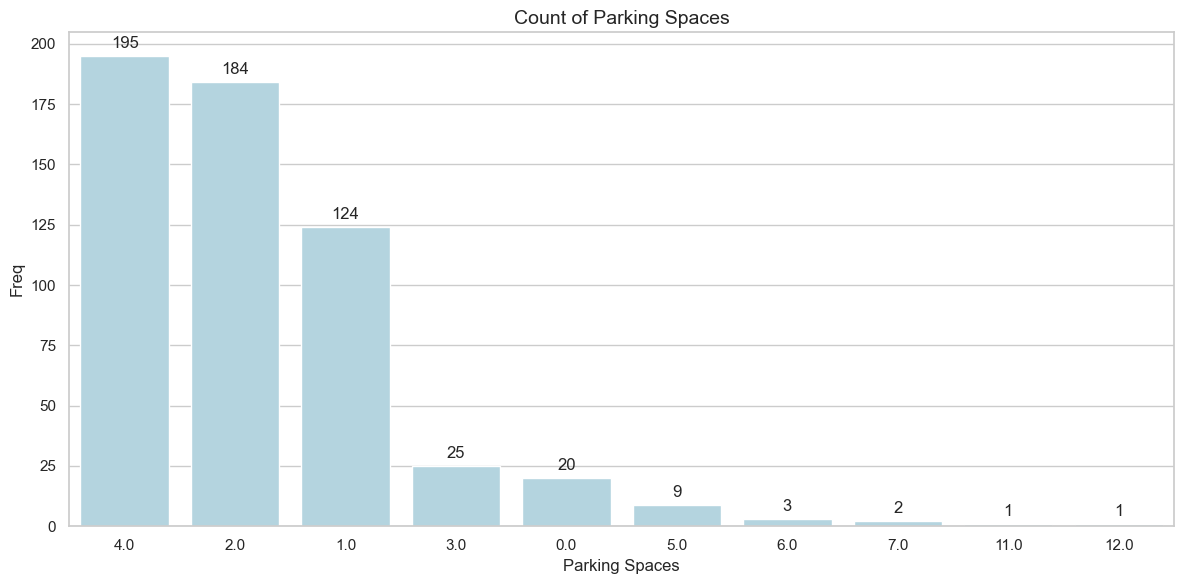

[{'Parking Spaces': 4.0, 'count': 195}, {'Parking Spaces': 2.0, 'count': 184}, {'Parking Spaces': 1.0, 'count': 124}, {'Parking Spaces': 3.0, 'count': 25}, {'Parking Spaces': 0.0, 'count': 20}, {'Parking Spaces': 5.0, 'count': 9}, {'Parking Spaces': 6.0, 'count': 3}, {'Parking Spaces': 7.0, 'count': 2}, {'Parking Spaces': 11.0, 'count': 1}, {'Parking Spaces': 12.0, 'count': 1}]


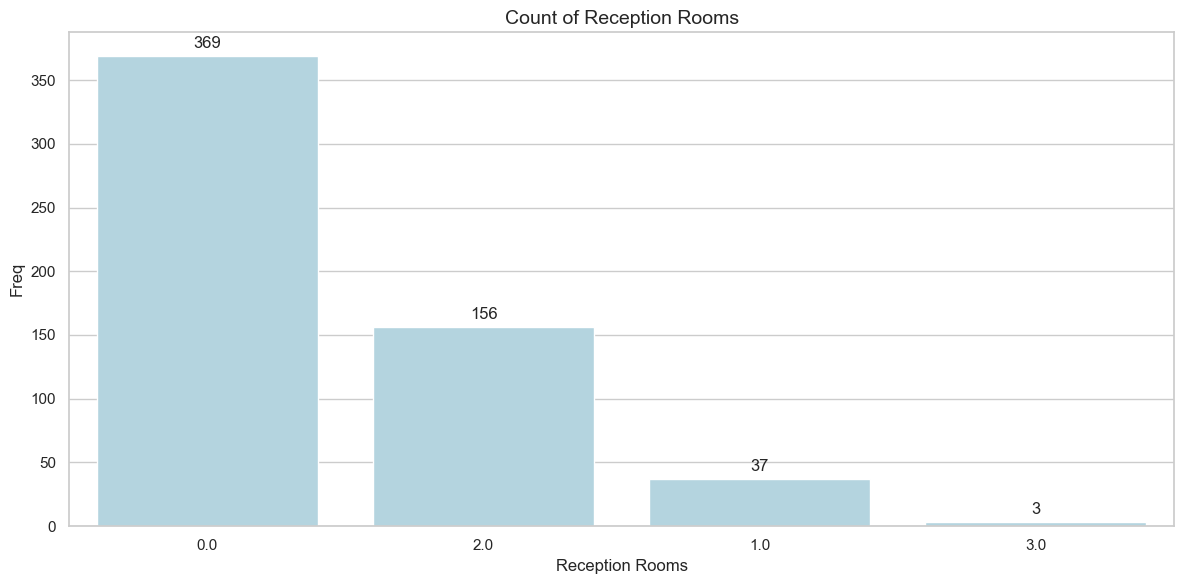

[{'Reception Rooms': 0.0, 'count': 369}, {'Reception Rooms': 2.0, 'count': 156}, {'Reception Rooms': 1.0, 'count': 37}, {'Reception Rooms': 3.0, 'count': 3}]


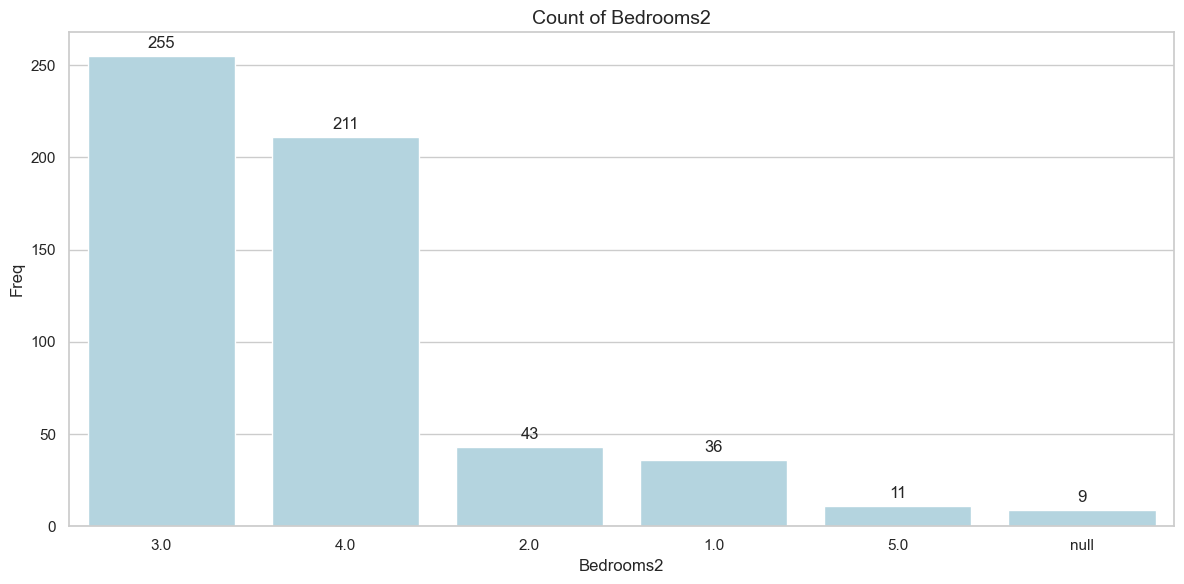

[{'Bedrooms2': 3.0, 'count': 255}, {'Bedrooms2': 4.0, 'count': 211}, {'Bedrooms2': 2.0, 'count': 43}, {'Bedrooms2': 1.0, 'count': 36}, {'Bedrooms2': 5.0, 'count': 11}, {'Bedrooms2': 'null', 'count': 9}]


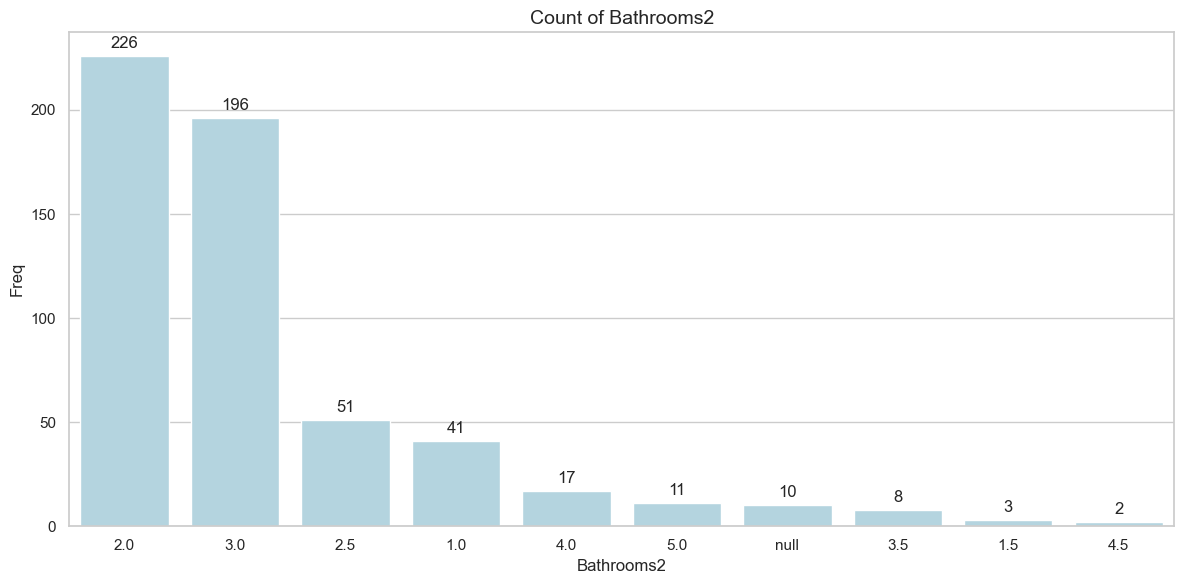

[{'Bathrooms2': 2.0, 'count': 226}, {'Bathrooms2': 3.0, 'count': 196}, {'Bathrooms2': 2.5, 'count': 51}, {'Bathrooms2': 1.0, 'count': 41}, {'Bathrooms2': 4.0, 'count': 17}, {'Bathrooms2': 5.0, 'count': 11}, {'Bathrooms2': 'null', 'count': 10}, {'Bathrooms2': 3.5, 'count': 8}, {'Bathrooms2': 1.5, 'count': 3}, {'Bathrooms2': 4.5, 'count': 2}]


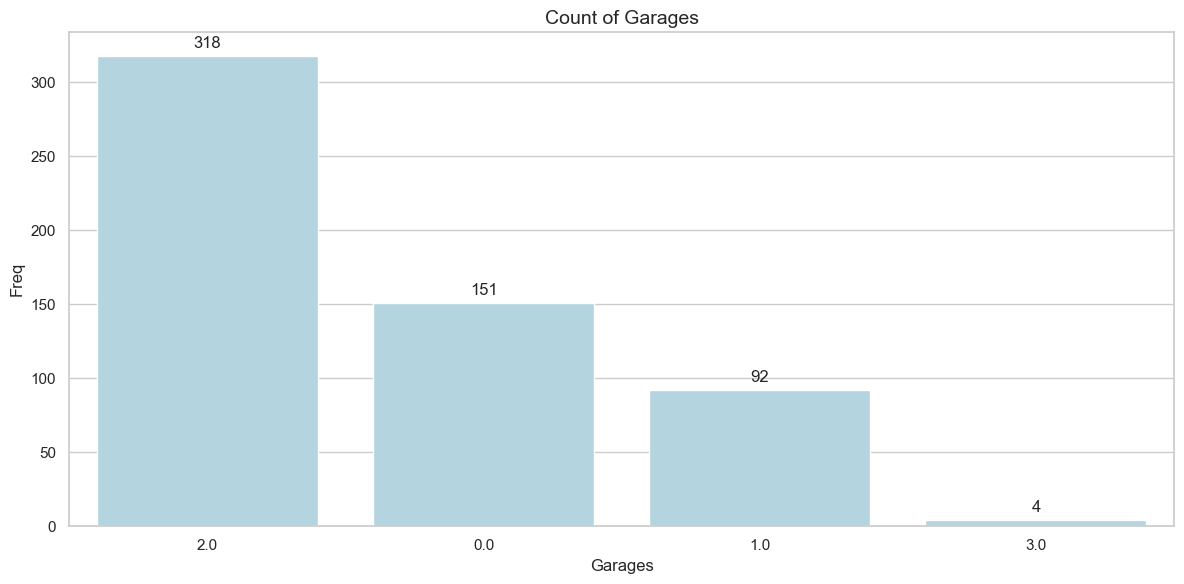

[{'Garages': 2.0, 'count': 318}, {'Garages': 0.0, 'count': 151}, {'Garages': 1.0, 'count': 92}, {'Garages': 3.0, 'count': 4}]


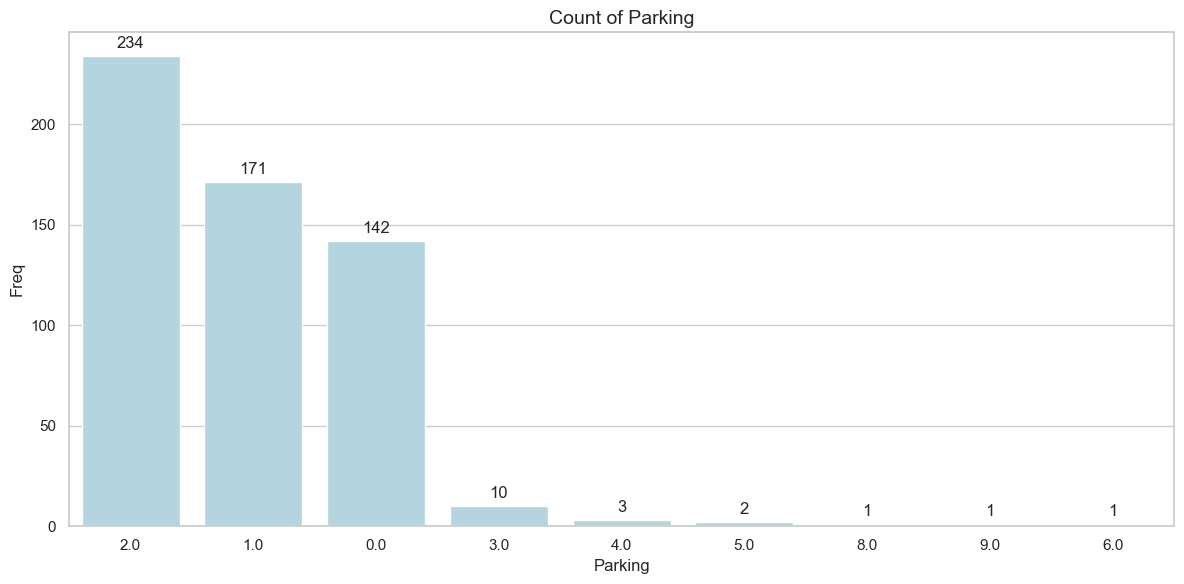

[{'Parking': 2.0, 'count': 234}, {'Parking': 1.0, 'count': 171}, {'Parking': 0.0, 'count': 142}, {'Parking': 3.0, 'count': 10}, {'Parking': 4.0, 'count': 3}, {'Parking': 5.0, 'count': 2}, {'Parking': 8.0, 'count': 1}, {'Parking': 9.0, 'count': 1}, {'Parking': 6.0, 'count': 1}]


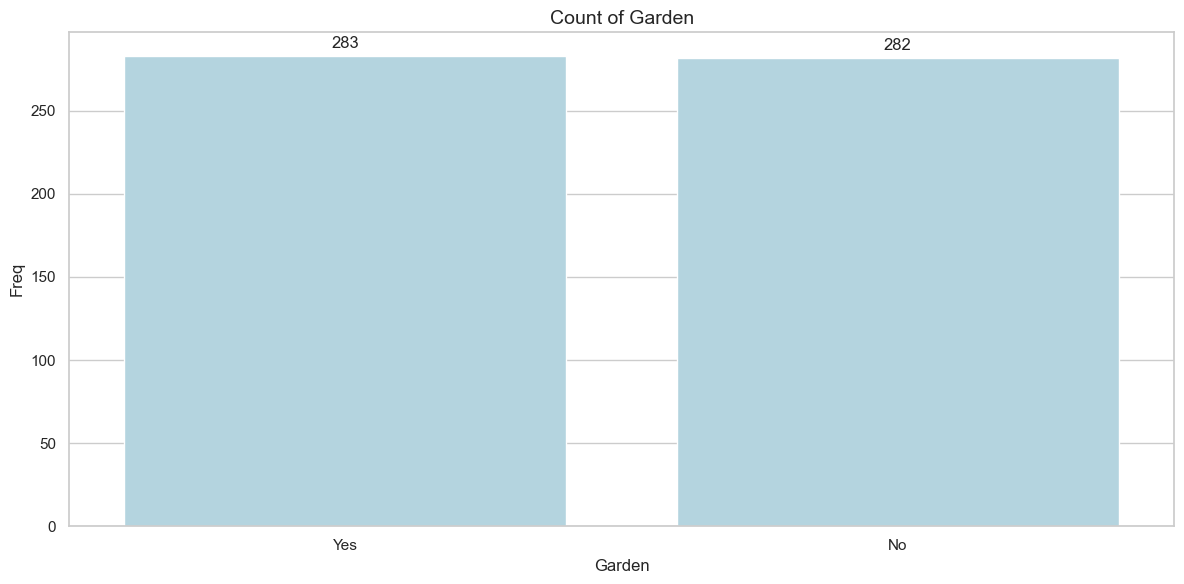

[{'Garden': 'Yes', 'count': 283}, {'Garden': 'No', 'count': 282}]


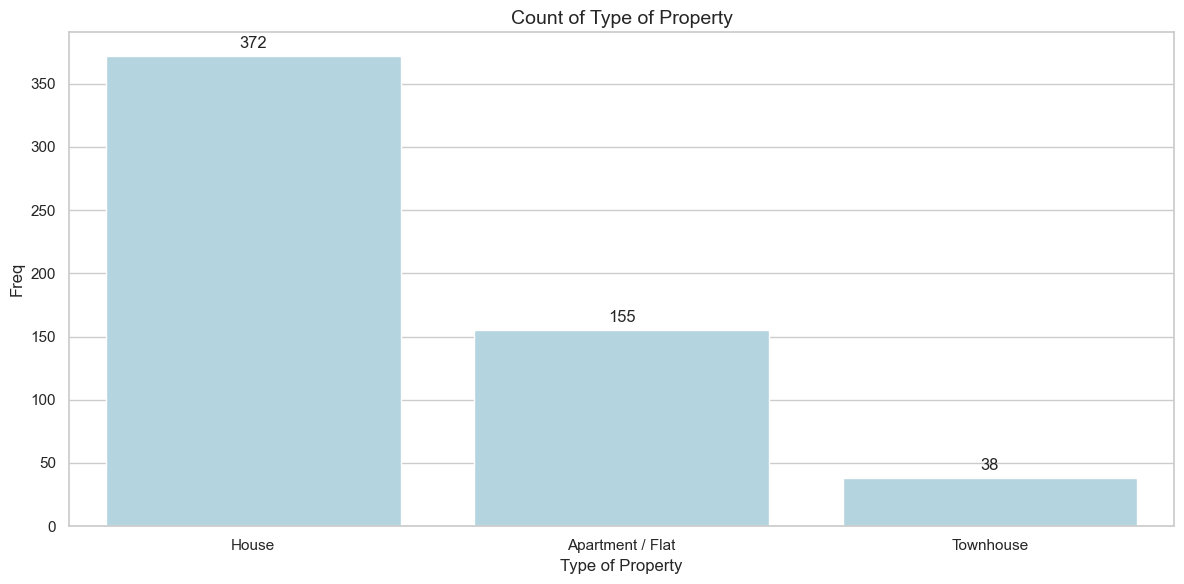

[{'Type of Property': 'House', 'count': 372}, {'Type of Property': 'Apartment / Flat', 'count': 155}, {'Type of Property': 'Townhouse', 'count': 38}]


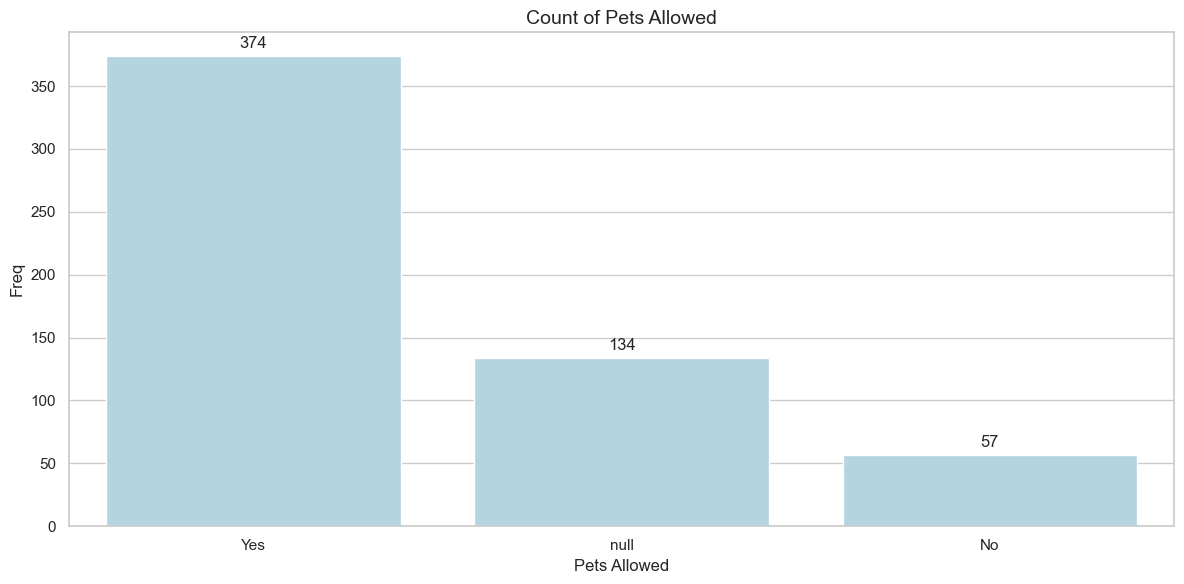

[{'Pets Allowed': 'Yes', 'count': 374}, {'Pets Allowed': 'null', 'count': 134}, {'Pets Allowed': 'No', 'count': 57}]


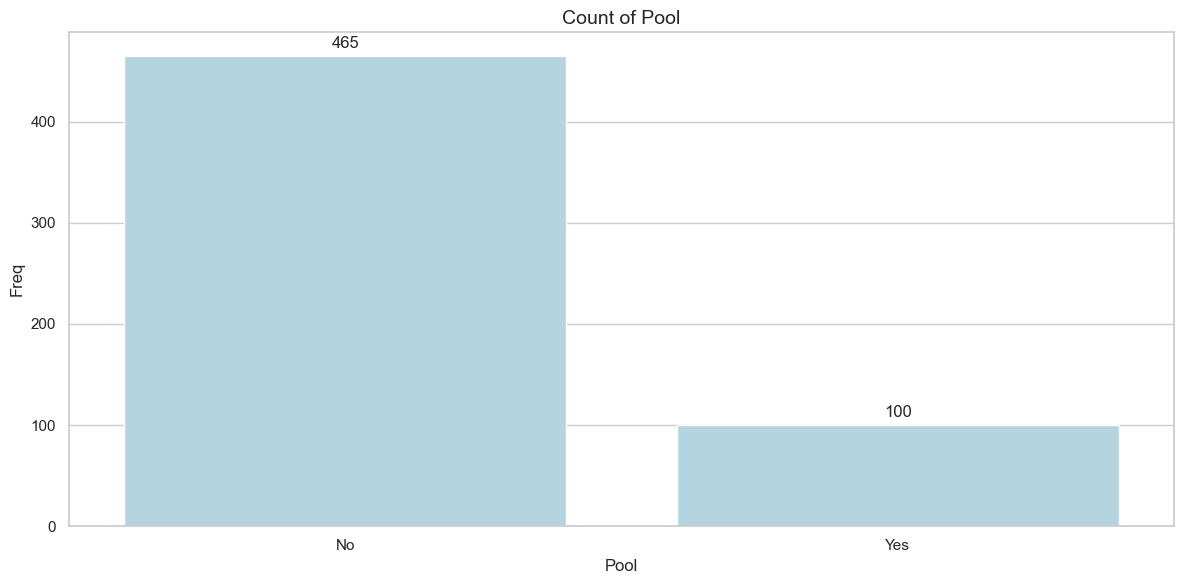

[{'Pool': 'No', 'count': 465}, {'Pool': 'Yes', 'count': 100}]


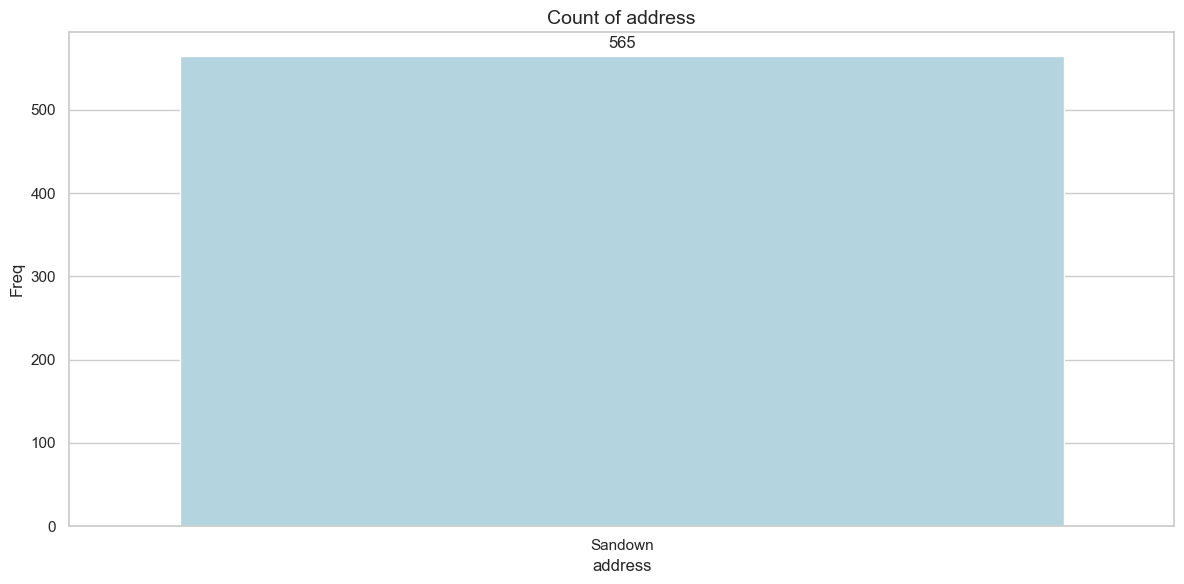

[{'address': 'Sandown', 'count': 565}]


In [16]:
cols = ['Parking Spaces', "Reception Rooms", 'Bedrooms2', 'Bathrooms2', 'Garages',
       'Parking','Garden', 'Type of Property', 'Pets Allowed', 'Pool', 'address']
for col in cols:
    data = plot_categores(col)
    print(data)

In [17]:
df.columns

Index(['Parking Spaces', 'Floor Size', 'Garden', 'Type of Property',
       'Pets Allowed', 'Reception Rooms', 'Erf Size', 'Pool', 'price2',
       'address', 'days_since_listing', 'Bedrooms2', 'Bathrooms2', 'Garages',
       'Parking'],
      dtype='object')

In [18]:
numeric_cols = ['Parking Spaces', 'Floor Size', 'Reception Rooms', 'Erf Size', 'price2',
       'Bedrooms2', 'Bathrooms2', 'Garages', 'Parking']

<Axes: >

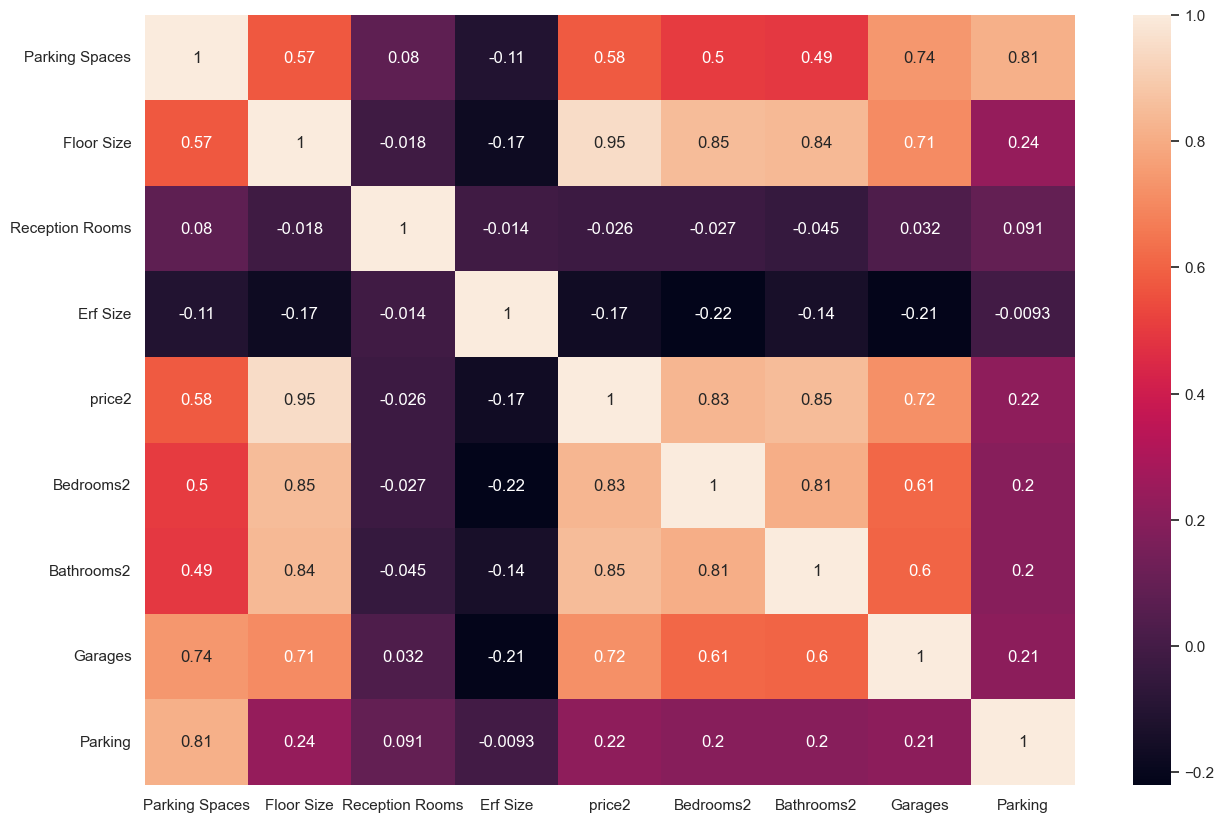

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numeric_cols].corr(), annot=True)

In [20]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ 
    
    Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    
    """
    sns.set_context(font_scale=1.5) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='green', orient="h") # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.histplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

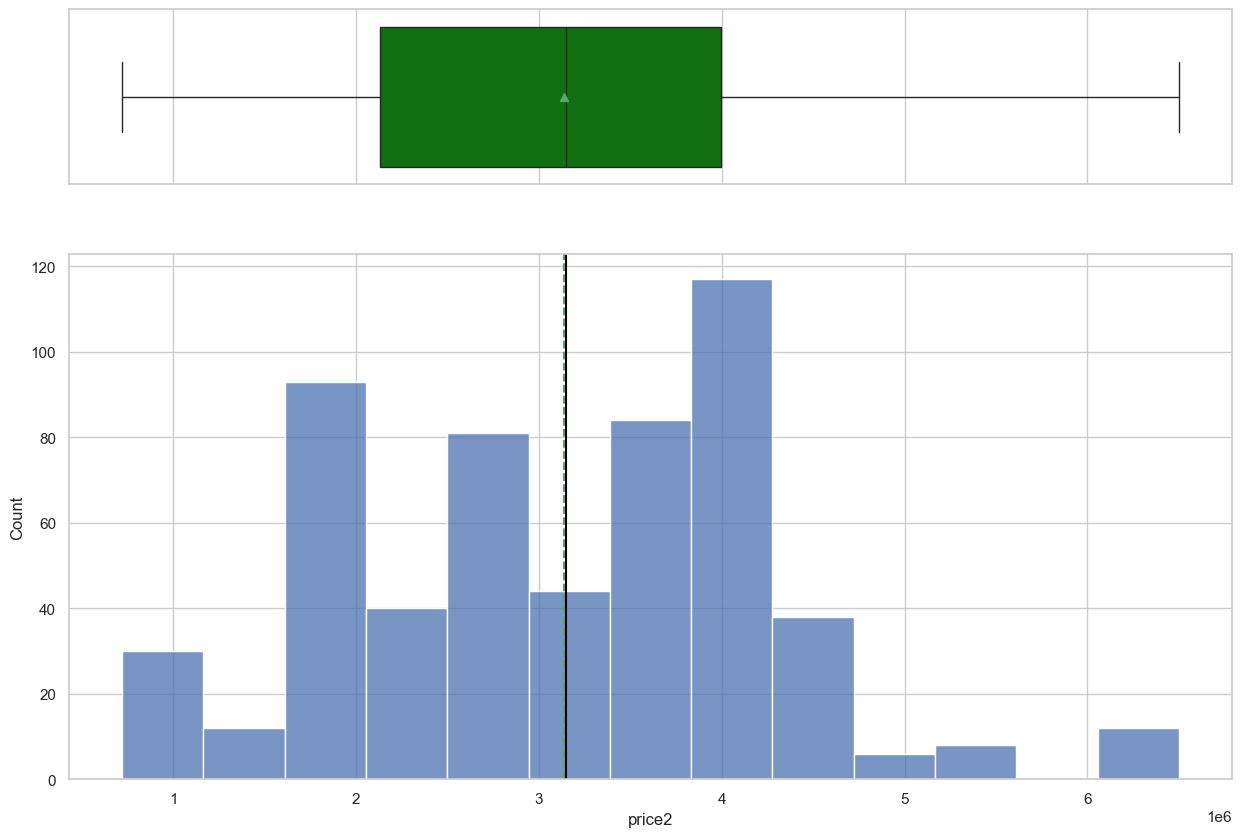

In [21]:
histogram_boxplot(df.price2)

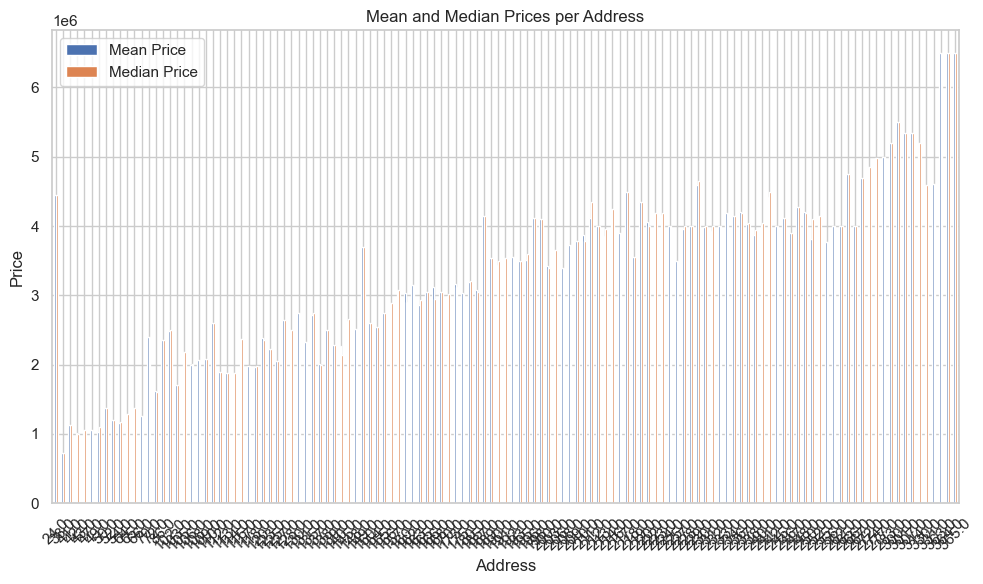

In [22]:
# Calculate mean and median prices per address
mean_prices = df.groupby('Floor Size')['price2'].mean()
median_prices = df.groupby('Floor Size')['price2'].median()

# Combine mean and median prices into a single DataFrame for plotting
summary_df = pd.DataFrame({
    'Mean Price': mean_prices,
    'Median Price': median_prices
})

# Plot the results
summary_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean and Median Prices per Address')
plt.xlabel('Address')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(['Mean Price', 'Median Price'])
plt.tight_layout()
plt.show()

In [23]:

# df = df[df["Type of Property"]=="House"]
# df["bedbath"] = df["Bedrooms2"]+df["Bathrooms2"]
# df["flooref"] = df["Floor Size"] * df["Erf Size"]

df = df.drop(["address", "days_since_listing", "Parking Spaces", 'Garages', "Erf Size"], axis=1)

In [24]:
df.head()

,Floor Size,Garden,Type of Property,Pets Allowed,Reception Rooms,Pool,price2,Bedrooms2,Bathrooms2,Parking
75,41.00,No,Apartment / Flat,Yes,0.00,Yes,1150000,1.00,1.00,1.00
346,272.00,Yes,House,Yes,0.00,Yes,4850000,4.00,3.00,2.00
628,109.00,No,Apartment / Flat,Yes,0.00,Yes,2080000,3.00,2.00,2.00
733,113.00,No,Apartment / Flat,Yes,0.00,No,1879500,3.00,2.00,1.00
836,307.00,Yes,House,Yes,0.00,Yes,5350000,4.00,4.00,0.00


In [25]:
df = df.dropna().reset_index(drop=True)
df.price2 = df.price2/1000

In [26]:
df.shape

(391, 10)

In [27]:
df.head()

,Floor Size,Garden,Type of Property,Pets Allowed,Reception Rooms,Pool,price2,Bedrooms2,Bathrooms2,Parking
0,41.00,No,Apartment / Flat,Yes,0.00,Yes,1150.00,1.00,1.00,1.00
1,272.00,Yes,House,Yes,0.00,Yes,4850.00,4.00,3.00,2.00
2,109.00,No,Apartment / Flat,Yes,0.00,Yes,2080.00,3.00,2.00,2.00
3,113.00,No,Apartment / Flat,Yes,0.00,No,1879.50,3.00,2.00,1.00
4,307.00,Yes,House,Yes,0.00,Yes,5350.00,4.00,4.00,0.00


In [28]:
df.columns

Index(['Floor Size', 'Garden', 'Type of Property', 'Pets Allowed',
       'Reception Rooms', 'Pool', 'price2', 'Bedrooms2', 'Bathrooms2',
       'Parking'],
      dtype='object')

In [29]:
df2 = pd.get_dummies(df, columns=["Type of Property", "Pool", "Garden", "Pets Allowed",], drop_first=True)

In [30]:
# df2
# df2=df
df2.head()

,Floor Size,Reception Rooms,price2,Bedrooms2,Bathrooms2,Parking,Type of Property_House,Type of Property_Townhouse,Pool_Yes,Garden_Yes,Pets Allowed_Yes
0,41.00,0.00,1150.00,1.00,1.00,1.00,False,False,True,False,True
1,272.00,0.00,4850.00,4.00,3.00,2.00,True,False,True,True,True
2,109.00,0.00,2080.00,3.00,2.00,2.00,False,False,True,False,True
3,113.00,0.00,1879.50,3.00,2.00,1.00,False,False,False,False,True
4,307.00,0.00,5350.00,4.00,4.00,0.00,True,False,True,True,True


In [31]:
# lets build our linear model
# independant variables
X = df2.drop(['price2'], axis=1)
# the dependent variable
y = df2[['price2']]

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler

In [33]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [35]:
# for idx, col_name in enumerate(X_train.columns):
#     print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [36]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3190.8113479853478


In [37]:
regression_model.score(X_train, y_train)

0.9225834426041307

In [38]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)


0.9385003175031696

In [39]:
y_pred = regression_model.predict(X_test)
y_true = y_test["price2"]

pd.DataFrame({"y_true": y_true.to_list(), "y_pred": y_pred.ravel()})

,y_true,y_pred
0,2929.50,3101.08
1,1100.00,882.70
2,1604.90,1611.10
3,2600.00,2500.29
4,4599.00,5125.37
...,...,...
113,4625.00,4411.64
114,2929.50,2927.32
115,6500.00,6073.86
116,4099.00,3512.13


In [40]:
np.squeeze(y_pred)

array([3101.07514286,  882.70092084, 1611.09684586, 2500.2897372 ,
       5125.36830686, 2143.33207616,  955.76303026, 1986.59115037,
       2807.36425145, 3973.66034127,  892.4589656 , 4410.07233065,
       3983.65078965, 2406.28539081, 3150.53142534, 3425.2343024 ,
       3738.98213568, 4116.10622841, 4173.93927921, 3837.04771454,
        946.00498549, 5950.03576413, 2044.33374341, 3895.17581924,
       3640.17692876, 2703.5697054 , 2032.74631642, 4207.85341565,
       2581.48075273, 3116.62781958, 4022.4505651 , 2040.02369337,
       1979.88502173, 2861.64767404, 3908.87169469, 1985.2131463 ,
        892.4589656 , 3876.0798936 , 1635.30153879, 4366.12623964,
       1009.5555028 , 3578.24282967, 3914.19981927, 3397.51553617,
       4842.89619076, 4164.39131639, 2043.7614149 , 4041.05440123,
       5033.78260032, 2932.9091022 , 3191.4719437 , 2089.95857423,
       2151.62703181, 3886.72738456, 2052.90192713, 2088.8139172 ,
       4056.41330279, 3014.2587235 , 3837.04771454, 2890.92180

In [41]:
mean_absolute_error(y_pred, y_test)

np.float64(206.85705346331483)

In [42]:
mean_squared_error(y_pred, y_test)

np.float64(82194.84167664412)

In [43]:
# # Assuming X_test, y_test, and y_pred are already defined
# # Convert y_test to a DataFrame and reset the index
# y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

# # Convert y_pred to a DataFrame
# y_pred_df = pd.DataFrame(y_pred, columns=["y_pred"]).reset_index(drop=True)

# # Concatenate X_test, y_test_df, and y_pred_df along the columns axis
# # Reset index for X_test to ensure the indices align after splitting
# X_test_reset = X_test.reset_index(drop=True)

# # Combine everything into one DataFrame
# results_df = pd.concat([X_test_reset, y_test_df, y_pred_df], axis=1)

# # Rename the true values column to "y_true"

# results_df

In [50]:
# Initialize Ridge model
ridge = Ridge(alpha=10)  # alpha is the regularization strength

# Fit the model
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression MSE: {mse_ridge}')

Ridge Regression MSE: 81753.06340113831


In [51]:
y_pred = ridge.predict(X_test)
y_true = y_test["price2"]
pd.DataFrame({"y_true": y_true.to_list(), "y_pred": y_pred.ravel()})

,y_true,y_pred
0,2929.50,3112.29
1,1100.00,910.02
2,1604.90,1658.09
3,2600.00,2510.58
4,4599.00,5008.17
...,...,...
113,4625.00,4435.84
114,2929.50,2887.91
115,6500.00,6000.67
116,4099.00,3481.31


In [52]:
# Initialize Lasso model
lasso = Lasso(alpha=10)  # alpha is the regularization strength

# Fit the model
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression MSE: {mse_lasso}')

Lasso Regression MSE: 84946.97965996167


In [53]:
y_pred = ridge.predict(X_test)
y_true = y_test["price2"]
pd.DataFrame({"y_true": y_true.to_list(), "y_pred": y_pred.ravel()}).to_dict(orient="records")

[{'y_true': 2929.5, 'y_pred': 3112.293419878006},
 {'y_true': 1100.0, 'y_pred': 910.0182954428287},
 {'y_true': 1604.9, 'y_pred': 1658.094305385186},
 {'y_true': 2600.0, 'y_pred': 2510.5776667797218},
 {'y_true': 4599.0, 'y_pred': 5008.174398202533},
 {'y_true': 2350.0, 'y_pred': 2187.824588510229},
 {'y_true': 1077.7, 'y_pred': 981.4018276203674},
 {'y_true': 2099.0, 'y_pred': 2009.3823299420028},
 {'y_true': 2700.0, 'y_pred': 2830.414035489002},
 {'y_true': 4200.0, 'y_pred': 3980.0616994159714},
 {'y_true': 950.0, 'y_pred': 918.4521526941558},
 {'y_true': 4195.0, 'y_pred': 4413.704842805418},
 {'y_true': 3850.0, 'y_pred': 3978.114710777094},
 {'y_true': 2350.0, 'y_pred': 2376.139722603921},
 {'y_true': 3200.0, 'y_pred': 3129.276752114547},
 {'y_true': 3250.0, 'y_pred': 3495.5037146657182},
 {'y_true': 3545.0, 'y_pred': 3708.5619714956083},
 {'y_true': 4200.0, 'y_pred': 4125.343989854179},
 {'y_true': 4299.0, 'y_pred': 4127.894602982957},
 {'y_true': 3780.0, 'y_pred': 3861.98769789738

In [48]:
from sklearn.model_selection import GridSearchCV

# For Ridge
ridge_cv = GridSearchCV(Ridge(), {'alpha': np.logspace(-6, 6, 13)}, cv=5)
ridge_cv.fit(X_train, y_train)
best_ridge_alpha = ridge_cv.best_params_['alpha']
print(f'Best alpha for Ridge: {best_ridge_alpha}')

# For Lasso
lasso_cv = GridSearchCV(Lasso(), {'alpha': np.logspace(-6, 6, 13)}, cv=5)
lasso_cv.fit(X_train, y_train)
best_lasso_alpha = lasso_cv.best_params_['alpha']
print(f'Best alpha for Lasso: {best_lasso_alpha}')


Best alpha for Ridge: 10.0
Best alpha for Lasso: 10.0


In [49]:
ridge_best = Ridge(alpha=best_ridge_alpha).fit(X_train, y_train)
lasso_best = Lasso(alpha=best_lasso_alpha).fit(X_train, y_train)

# Predictions and evaluations
y_pred_ridge_best = ridge_best.predict(X_test)
y_pred_lasso_best = lasso_best.predict(X_test)

mse_ridge_best = mean_squared_error(y_test, y_pred_ridge_best)
mse_lasso_best = mean_squared_error(y_test, y_pred_lasso_best)

print(f'Best Ridge Regression MSE: {mse_ridge_best}')
print(f'Best Lasso Regression MSE: {mse_lasso_best}')


Best Ridge Regression MSE: 81753.06340113831
Best Lasso Regression MSE: 84946.97965996167
